In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kickstarter_data_full.csv', index_col = 0)
df.head()

c:\Users\andre\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [3]:
# Cleans data to show ~95% of columns are not null (63 out of 67 columns)
clean_df = df.dropna(thresh=63)

#Summary of cleaned data 
print(f"The original dataset had {len(df)} rows of data.  The cleaned dataset has {len(clean_df)} rows of data.")

The original dataset had 20632 rows of data.  The cleaned dataset has 18696 rows of data.


In [4]:
# remove superfluous columns
clean_df = clean_df.drop(["photo","blurb", "pledged", "slug", "disable_communication", "currency_symbol",
                          "currency_trailing_code", "deadline", "state_changed_at", "created_at",
                          "launched_at", "static_usd_rate", "creator", "location", "profile",
                          "urls", "source_url", "friends", "is_starred", "is_backing", "permissions",
                          "name_len","blurb_len" ,"create_to_launch", "launch_to_deadline", "launch_to_state_change", 
                          "USorGB", "TOPCOUNTRY", "LaunchedTuesday"], axis=1)

clean_df.head()

,id,name,goal,state,country,currency,staff_pick,backers_count,usd_pledged,category,...,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend
0,1454391034,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,failed,US,USD,False,0,0.000000,Academic,...,22,12,17,2014,13,17,36,36,0,0
1,1655206086,Jump Start Kindergarten Toolkit,500.0,failed,US,USD,False,0,0.000000,Academic,...,9,3,2,2015,16,10,60,60,0,0
2,311581827,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,failed,US,USD,False,5,120.000000,Academic,...,0,1,25,2015,8,1,60,60,0,0
3,859724515,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,failed,US,USD,False,0,0.000000,Academic,...,22,9,6,2014,0,0,30,30,0,0
4,1613604977,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,failed,DE,EUR,False,17,396.802395,Academic,...,14,5,26,2016,5,0,32,32,0,0


In [5]:
# examine datatypes
print(clean_df.dtypes)

id                               int64
name                            object
goal                           float64
state                           object
country                         object
currency                        object
staff_pick                        bool
backers_count                    int64
usd_pledged                    float64
category                        object
spotlight                         bool
name_len_clean                 float64
blurb_len_clean                float64
deadline_weekday                object
state_changed_at_weekday        object
created_at_weekday              object
launched_at_weekday             object
deadline_month                   int64
deadline_day                     int64
deadline_yr                      int64
deadline_hr                      int64
state_changed_at_month           int64
state_changed_at_day             int64
state_changed_at_yr              int64
state_changed_at_hr              int64
created_at_month         

In [6]:
# update to relevant datatypes
clean_df = clean_df.astype({"id": object, "SuccessfulBool": bool, "DeadlineWeekend": bool})
print(clean_df.dtypes)

id                              object
name                            object
goal                           float64
state                           object
country                         object
currency                        object
staff_pick                        bool
backers_count                    int64
usd_pledged                    float64
category                        object
spotlight                         bool
name_len_clean                 float64
blurb_len_clean                float64
deadline_weekday                object
state_changed_at_weekday        object
created_at_weekday              object
launched_at_weekday             object
deadline_month                   int64
deadline_day                     int64
deadline_yr                      int64
deadline_hr                      int64
state_changed_at_month           int64
state_changed_at_day             int64
state_changed_at_yr              int64
state_changed_at_hr              int64
created_at_month         

In [7]:
# create list of columns for the correlation matrix
corr_input_col = ['SuccessfulBool', "goal", 'backers_count', 'usd_pledged', 'name_len_clean', 'blurb_len_clean', 'deadline_month',
                  'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day',
                  'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_yr',
                  'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
                   'create_to_launch_days','launch_to_deadline_days', 'launch_to_state_change_days']

corr_df = clean_df[corr_input_col]

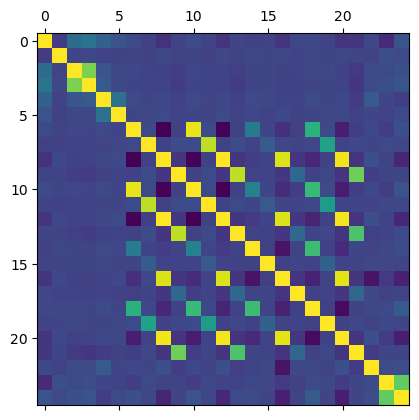

In [8]:
# correlation matrix heatmap
correlation_matrix = corr_df.corr()

plt.matshow(correlation_matrix)
plt.show()



In [9]:
# correlation matrix printout for specific analysis
print(correlation_matrix)

                             SuccessfulBool      goal  backers_count  \
SuccessfulBool                     1.000000 -0.038640       0.183405   
goal                              -0.038640  1.000000       0.003084   
backers_count                      0.183405  0.003084       1.000000   
usd_pledged                        0.224978  0.011186       0.749400   
name_len_clean                     0.130270 -0.009178       0.070406   
blurb_len_clean                    0.061038 -0.013313       0.009170   
deadline_month                     0.021901 -0.003279       0.004332   
deadline_day                      -0.013174 -0.020882      -0.008973   
deadline_yr                       -0.075615  0.009075      -0.011804   
deadline_hr                       -0.005951 -0.002055      -0.028166   
state_changed_at_month             0.025523 -0.000659       0.004171   
state_changed_at_day              -0.009366 -0.015596      -0.008564   
state_changed_at_yr               -0.071820  0.007936      -0.01

In [10]:
clean_df.head()

,id,name,goal,state,country,currency,staff_pick,backers_count,usd_pledged,category,...,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend
0,1454391034,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,failed,US,USD,False,0,0.000000,Academic,...,22,12,17,2014,13,17,36,36,False,False
1,1655206086,Jump Start Kindergarten Toolkit,500.0,failed,US,USD,False,0,0.000000,Academic,...,9,3,2,2015,16,10,60,60,False,False
2,311581827,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,failed,US,USD,False,5,120.000000,Academic,...,0,1,25,2015,8,1,60,60,False,False
3,859724515,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,failed,US,USD,False,0,0.000000,Academic,...,22,9,6,2014,0,0,30,30,False,False
4,1613604977,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,failed,DE,EUR,False,17,396.802395,Academic,...,14,5,26,2016,5,0,32,32,False,False


In [11]:
print(clean_df.columns.tolist())

['id', 'name', 'goal', 'state', 'country', 'currency', 'staff_pick', 'backers_count', 'usd_pledged', 'category', 'spotlight', 'name_len_clean', 'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'SuccessfulBool', 'DeadlineWeekend']


In [12]:
# further refining the dataframe
clean_df = clean_df.drop(['id','name','deadline_day','deadline_yr','deadline_hr','state_changed_at_day','state_changed_at_yr','state_changed_at_hr',
                          'created_at_month','created_at_day','created_at_yr','created_at_hr','launched_at_day','launched_at_yr','launched_at_hr'], axis=1)

In [13]:
clean_df.head()

,goal,state,country,currency,staff_pick,backers_count,usd_pledged,category,spotlight,name_len_clean,...,created_at_weekday,launched_at_weekday,deadline_month,state_changed_at_month,launched_at_month,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend
0,1500.0,failed,US,USD,False,0,0.000000,Academic,False,9.0,...,Saturday,Wednesday,1,1,12,17,36,36,False,False
1,500.0,failed,US,USD,False,0,0.000000,Academic,False,4.0,...,Friday,Monday,5,5,3,10,60,60,False,False
2,100000.0,failed,US,USD,False,5,120.000000,Academic,False,8.0,...,Saturday,Sunday,3,3,1,1,60,60,False,False
3,5000.0,failed,US,USD,False,0,0.000000,Academic,False,6.0,...,Friday,Saturday,10,10,9,0,30,30,False,False
4,3222.0,failed,DE,EUR,False,17,396.802395,Academic,False,7.0,...,Wednesday,Thursday,6,6,5,0,32,32,False,False


In [16]:
# bucketing seasons
season_mapper = lambda x: 'Winter' if x in [12, 1, 2] else \
                          'Spring' if x in [3, 4, 5] else \
                          'Summer' if x in [6, 7, 8] else \
                          'Fall' if x in [9, 10, 11] else None

# apply the lambda function to the 'Month' column and assign the result to a new column 'Season'
clean_df['deadline_season'] = clean_df['deadline_month'].apply(season_mapper)
clean_df['launched_season'] = clean_df['launched_at_month'].apply(season_mapper)

# remove the months that were converted to seasons
clean_df = clean_df.drop(['deadline_month', 'launched_at_month'], axis=1)

# print the resulting dataframe
clean_df.head()


,goal,state,country,currency,staff_pick,backers_count,usd_pledged,category,spotlight,name_len_clean,...,created_at_weekday,launched_at_weekday,state_changed_at_month,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend,deadline_season,launched_season
0,1500.0,failed,US,USD,False,0,0.000000,Academic,False,9.0,...,Saturday,Wednesday,1,17,36,36,False,False,Winter,Winter
1,500.0,failed,US,USD,False,0,0.000000,Academic,False,4.0,...,Friday,Monday,5,10,60,60,False,False,Spring,Spring
2,100000.0,failed,US,USD,False,5,120.000000,Academic,False,8.0,...,Saturday,Sunday,3,1,60,60,False,False,Spring,Winter
3,5000.0,failed,US,USD,False,0,0.000000,Academic,False,6.0,...,Friday,Saturday,10,0,30,30,False,False,Fall,Fall
4,3222.0,failed,DE,EUR,False,17,396.802395,Academic,False,7.0,...,Wednesday,Thursday,6,0,32,32,False,False,Summer,Spring


In [17]:
# bucketing weekdays vs weekends
wd_we_mapper = lambda x: 'Weekend' if x in ["Saturday", "Sunday"] else \
                          'Weekday' if x in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] else None


clean_df['created_wd_we'] = clean_df['created_at_weekday'].apply(wd_we_mapper)
clean_df['launched_wd_we'] = clean_df['launched_at_weekday'].apply(wd_we_mapper)

clean_df = clean_df.drop(['created_at_weekday','launched_at_weekday'], axis=1)

clean_df.head()

,goal,state,country,currency,staff_pick,backers_count,usd_pledged,category,spotlight,name_len_clean,...,state_changed_at_month,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,DeadlineWeekend,deadline_season,launched_season,created_wd_we,launched_wd_we
0,1500.0,failed,US,USD,False,0,0.000000,Academic,False,9.0,...,1,17,36,36,False,False,Winter,Winter,Weekend,Weekday
1,500.0,failed,US,USD,False,0,0.000000,Academic,False,4.0,...,5,10,60,60,False,False,Spring,Spring,Weekday,Weekday
2,100000.0,failed,US,USD,False,5,120.000000,Academic,False,8.0,...,3,1,60,60,False,False,Spring,Winter,Weekend,Weekend
3,5000.0,failed,US,USD,False,0,0.000000,Academic,False,6.0,...,10,0,30,30,False,False,Fall,Fall,Weekday,Weekend
4,3222.0,failed,DE,EUR,False,17,396.802395,Academic,False,7.0,...,6,0,32,32,False,False,Summer,Spring,Weekday,Weekday
